In [1]:
#Data preparation

In [2]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import absolute
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [3]:
clinical_records = pd.read_csv("heart_failure_clinical_records_dataset.csv", error_bad_lines=False)

In [4]:
clinical_records.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
clinical_records.shape

(299, 13)

In [6]:
clinical_records.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
clinical_records.describe()
#creatinine_phosphokinase, platelets, serum_creatinine and serum_sodium need more investigation as max values look too high
#age and time looks fine since minimum and maximum age looks accurate

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
#checking for null values
clinical_records.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [9]:
#checking if there are different values
clinical_records['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [10]:
clinical_records['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [11]:
clinical_records['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [12]:
clinical_records['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [13]:
clinical_records['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [14]:
clinical_records['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [15]:
#Investigating Creatinine Phosphokinase
CP_data = clinical_records['creatinine_phosphokinase']
Q1 = CP_data.quantile(0.25)
Q3 = CP_data.quantile(0.75)
IQR = Q3-Q1
min_whisker = Q1-(IQR*1.5)
max_whisker = Q3 +(IQR*1.5)
outliers = CP_data[(CP_data<min_whisker)|(CP_data>max_whisker)]
outliers.values
#We can't assume these values to be impossible or invalid outliers as according to 
#https://www.mountsinai.org/health-library/tests/creatine-phosphokinase-test, there are possibilities for abnormal values
#Therefore, there is no justification to remove these values. We can instead use it for our analysis

array([7861, 2656, 1380, 3964, 7702, 5882, 5209, 1876, 1808, 4540, 1548,
       1610, 2261, 1846, 2334, 2442, 3966, 1419, 1896, 1767, 2281, 2794,
       2017, 2522, 2695, 1688, 1820, 2060, 2413], dtype=int64)

In [16]:
#Investigating Platelets
P_data = clinical_records['platelets']
Q1 = P_data.quantile(0.25)
Q3 = P_data.quantile(0.75)
IQR = Q3-Q1
min_whisker = Q1-(IQR*1.5)
max_whisker = Q3 +(IQR*1.5)
outliers = P_data[(P_data<min_whisker)|(P_data>max_whisker)]
outliers.values
#Same as Creatinine phospholinase, humans can have higher than normal rates of platelets in the blood. This was stated by 
#https://www.infobloom.com/what-is-a-high-platelet-count.htm . As a result, there is no strong reason to remove these values

array([454000.,  47000., 451000., 461000., 497000., 621000., 850000.,
       507000., 448000.,  75000.,  70000.,  73000., 481000., 504000.,
        62000., 533000.,  25100., 451000.,  51000., 543000., 742000.])

In [17]:
#Investigating Serum Creatinine
SC_data = clinical_records['serum_creatinine']
Q1 = SC_data.quantile(0.25)
Q3 = SC_data.quantile(0.75)
IQR = Q3-Q1
min_whisker = Q1-(IQR*1.5)
max_whisker = Q3 +(IQR*1.5)
outliers = SC_data[(SC_data<min_whisker)|(SC_data>max_whisker)]
outliers.values
#According to the article https://www.emedicinehealth.com/creatinine_blood_tests/article_em.htm , a higher value of 
#serum creatinine signals health problems in the patient. Therefore, these are valid outliers

array([2.7, 9.4, 4. , 5.8, 3. , 3.5, 2.3, 3. , 4.4, 6.8, 2.2, 2.7, 2.3,
       2.9, 2.5, 2.3, 3.2, 3.7, 3.4, 6.1, 2.5, 2.4, 2.5, 3.5, 9. , 5. ,
       2.4, 2.7, 3.8])

In [18]:
#Investigating Serum Sodium
SS_data = clinical_records['serum_sodium']
Q1 = SS_data.quantile(0.25)
Q3 = SS_data.quantile(0.75)
IQR = Q3-Q1
min_whisker = Q1-(IQR*1.5)
max_whisker = Q3 +(IQR*1.5)
outliers = SS_data[(SS_data<min_whisker)|(SS_data>max_whisker)]
outliers.values
#It is possible for a patient to have serum sodium levels below the normal 135 mEq/L, so these values are not invalid outliers

array([116, 121, 124, 113], dtype=int64)

In [19]:
#The data looks clean and no further checking is required. Outliers can stay for data exploration as it's important to explore
#unusual observations, but we will have to standarize it for Data Modelling, as it can affect accuracy of KNN model.

In [20]:
#Data Exploration

In [21]:
#Let's explore each column in detail

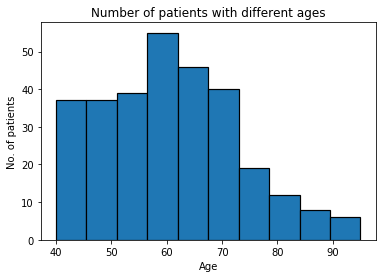

In [22]:
#We can see the age range of the patients.
clinical_records['age'].plot(kind = 'hist', bins = 10,edgecolor='black', linewidth=1.2)
plt.title('Number of patients with different ages')
plt.xlabel('Age')
plt.ylabel('No. of patients')
plt.show()

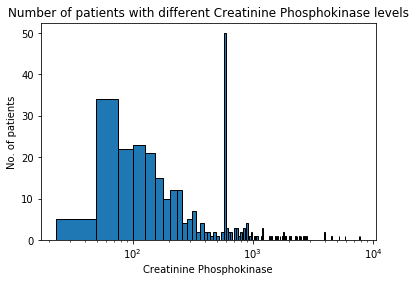

In [23]:
#x values are way too high to draw, therefore, we need to use log scale
#The historgram is skewed to the right
clinical_records['creatinine_phosphokinase'].plot(kind = 'hist', bins = 300,edgecolor='black')
plt.title('Number of patients with different Creatinine Phosphokinase levels')
plt.xscale('log')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('No. of patients')
plt.show()

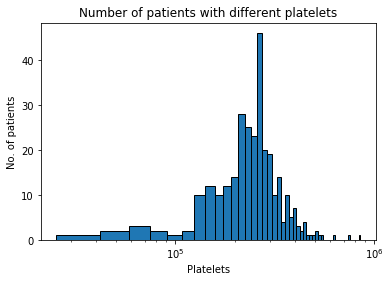

In [24]:
#Again, x values are too high. we need log scale
#Overall,this diagram is a bit skewed to the left
clinical_records['platelets'].plot(kind = 'hist', bins = 50,edgecolor='black')
plt.title('Number of patients with different platelets')
plt.xscale('log')
plt.xlabel('Platelets')
plt.ylabel('No. of patients')
plt.show()

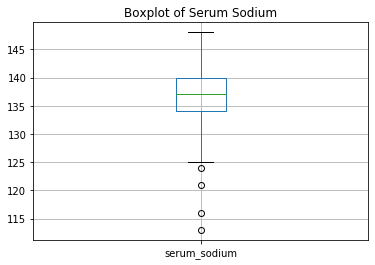

In [25]:
#There seem to be few outliers. Overall, it is symmetrically distributed
clinical_records.boxplot(column='serum_sodium')
plt.title('Boxplot of Serum Sodium')
plt.show()

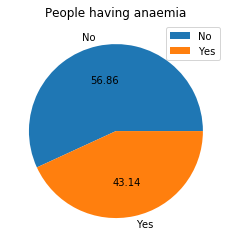

In [26]:
#Getting the percentage of people having anaemia
labels= ['No','Yes']
clinical_records['anaemia'].value_counts().plot(kind= 'pie',autopct='%.2f',labels=labels)
plt.title('People having anaemia')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

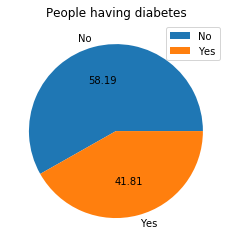

In [27]:
#Getting the percentage of people having diabetes
labels= ['No','Yes']
clinical_records['diabetes'].value_counts().plot(kind= 'pie',autopct='%.2f',labels=labels)
plt.title('People having diabetes')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

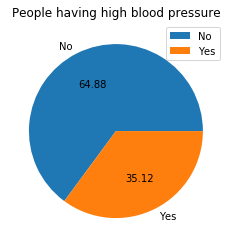

In [28]:
#Getting the percentage of people having high blood pressure
labels= ['No','Yes']
clinical_records['high_blood_pressure'].value_counts().plot(kind= 'pie',autopct='%.2f',labels=labels)
plt.title('People having high blood pressure')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

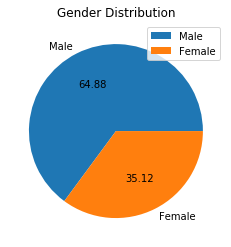

In [29]:
#No. of males and females
labels= ['Male','Female']
clinical_records['sex'].value_counts().plot(kind= 'pie',autopct='%.2f',labels=labels)
plt.title('Gender Distribution')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

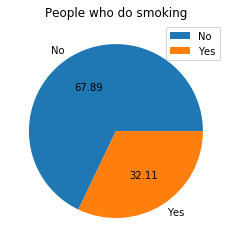

In [30]:
#Percentage of people who smoke
labels= ['No','Yes']
clinical_records['smoking'].value_counts().plot(kind= 'pie',autopct='%.2f',labels=labels)
plt.title('People who do smoking')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

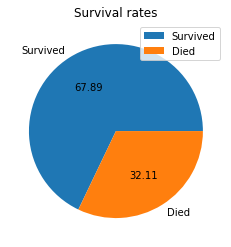

In [31]:
#Percentage of overall survival rates
labels= ['Survived','Died']
clinical_records['DEATH_EVENT'].value_counts().plot(kind= 'pie',autopct='%.2f',labels=labels)
plt.title('Survival rates')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

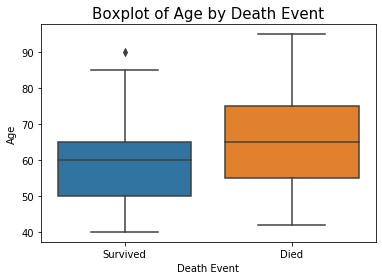

In [32]:
#Releationship between age and death rates.
#Younger people seemed to have better survival rate than those older.
sns.boxplot(clinical_records['DEATH_EVENT'], clinical_records['age'])
plt.xlabel("Death Event")
plt.ylabel("Age")
ticks = [0,1]
labels = ['Survived','Died']
plt.xticks(ticks,labels)
plt.title('Boxplot of Age by Death Event', fontsize = 15)
plt.show()

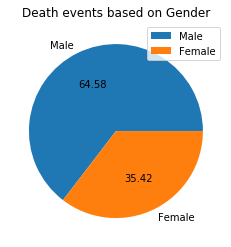

In [33]:
#Relationship between gender and death rates

#More males have died in comparsion to females.

male_records = clinical_records[clinical_records.sex==1]
male_death = male_records[male_records.DEATH_EVENT==1]

female_records = clinical_records[clinical_records.sex==0]
female_death = female_records[female_records.DEATH_EVENT==1]

values = [male_death.shape[0],female_death.shape[0]]
df = pd.DataFrame(values)
labels= ['Male','Female']
df.plot(kind='pie', subplots=True, autopct='%.2f',labels=labels)
plt.title('Death events based on Gender')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

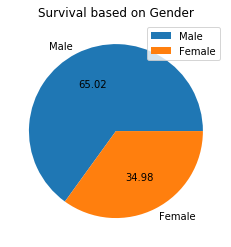

In [34]:
#Interestingly, more males have survived in comparsion to females

male_records = clinical_records[clinical_records.sex==1]
male_survival = male_records[male_records.DEATH_EVENT==0]


female_records = clinical_records[clinical_records.sex==0]
female_survival = female_records[female_records.DEATH_EVENT==0]

values = [male_survival.shape[0],female_survival.shape[0]]
df = pd.DataFrame(values)
labels= ['Male','Female']
df.plot(kind='pie', subplots=True, autopct='%.2f',labels=labels)
plt.title('Survival based on Gender')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

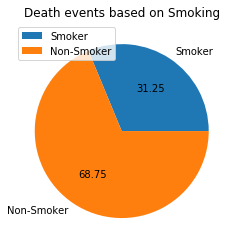

In [35]:
#Relationship between smoking and death rates

smoker_records = clinical_records[clinical_records.smoking==1]
smoker_death = smoker_records[smoker_records.DEATH_EVENT==1]

non_smoker_records = clinical_records[clinical_records.smoking==0]
non_smoker_death = non_smoker_records[non_smoker_records.DEATH_EVENT==1]

values = [smoker_death.shape[0],non_smoker_death.shape[0]]
df = pd.DataFrame(values)
labels= ['Smoker','Non-Smoker']
df.plot(kind='pie', subplots=True, autopct='%.2f',labels=labels)
plt.legend(labels, loc="best")
plt.title('Death events based on Smoking')
plt.legend(labels, loc=2)
plt.ylabel('')
plt.show()

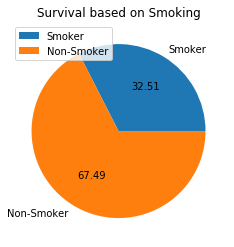

In [36]:

smoker_records = clinical_records[clinical_records.smoking==1]
smoker_survival = smoker_records[smoker_records.DEATH_EVENT==0]


non_smoker_records = clinical_records[clinical_records.smoking==0]
non_smoker_survival = non_smoker_records[non_smoker_records.DEATH_EVENT==0]

values = [smoker_survival.shape[0],non_smoker_survival.shape[0]]
df = pd.DataFrame(values)
labels= ['Smoker','Non-Smoker']
df.plot(kind='pie', subplots=True, autopct='%.2f',labels=labels)
plt.title('Survival based on Smoking')
plt.legend(labels, loc=2)
plt.ylabel('')
plt.show()

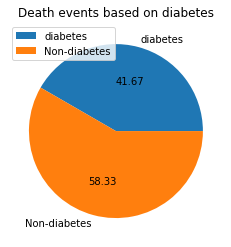

In [37]:
#Relationship between diabetes and death event
diabetes_records = clinical_records[clinical_records.diabetes==1]
diabetes_death = diabetes_records[diabetes_records.DEATH_EVENT==1]

non_diabetes_records = clinical_records[clinical_records.diabetes==0]
non_diabetes_death = non_diabetes_records[non_diabetes_records.DEATH_EVENT==1]

values = [diabetes_death.shape[0],non_diabetes_death.shape[0]]
df = pd.DataFrame(values)
labels= ['diabetes','Non-diabetes']
df.plot(kind='pie', subplots=True, autopct='%.2f',labels=labels)
plt.legend(labels, loc="best")
plt.title('Death events based on diabetes')
plt.legend(labels, loc=2)
plt.ylabel('')
plt.show()

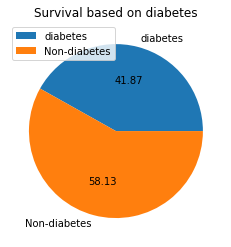

In [38]:
diabetes_records = clinical_records[clinical_records.diabetes==1]
diabetes_survival =diabetes_records[diabetes_records.DEATH_EVENT==0]


non_diabetes_records = clinical_records[clinical_records.diabetes==0]
non_diabetes_survival = non_diabetes_records[non_diabetes_records.DEATH_EVENT==0]

values = [diabetes_survival.shape[0],non_diabetes_survival.shape[0]]
df = pd.DataFrame(values)
labels= ['diabetes','Non-diabetes']
df.plot(kind='pie', subplots=True, autopct='%.2f',labels=labels)
plt.title('Survival based on diabetes')
plt.legend(labels, loc=2)
plt.ylabel('')
plt.show()

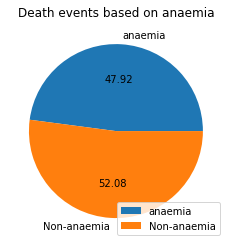

In [39]:
#Relationship between anaemia and death event
anaemia_records = clinical_records[clinical_records.anaemia==1]
anaemia_death = anaemia_records[anaemia_records.DEATH_EVENT==1]

non_anaemia_records = clinical_records[clinical_records.anaemia==0]
non_anaemia_death = non_anaemia_records[non_anaemia_records.DEATH_EVENT==1]

values = [anaemia_death.shape[0],non_anaemia_death.shape[0]]
df = pd.DataFrame(values)
labels= ['anaemia','Non-anaemia']
df.plot(kind='pie', subplots=True, autopct='%.2f',labels=labels)
plt.legend(labels, loc="best")
plt.title('Death events based on anaemia')
plt.legend(labels, loc="lower right")
plt.ylabel('')
plt.show()

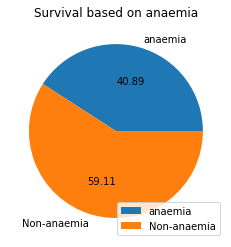

In [40]:
anaemia_records = clinical_records[clinical_records.anaemia==1]
anaemia_survival =anaemia_records[anaemia_records.DEATH_EVENT==0]


non_anaemia_records = clinical_records[clinical_records.anaemia==0]
non_anaemia_survival = non_anaemia_records[non_anaemia_records.DEATH_EVENT==0]

values = [anaemia_survival.shape[0],non_anaemia_survival.shape[0]]
df = pd.DataFrame(values)
labels= ['anaemia','Non-anaemia']
df.plot(kind='pie', subplots=True, autopct='%.2f',labels=labels)
plt.title('Survival based on anaemia')
plt.legend(labels, loc="lower right")
plt.ylabel('')
plt.show()

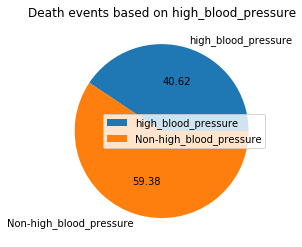

In [41]:
#Relationship between high blood pressure and death event
high_blood_pressure_records = clinical_records[clinical_records.high_blood_pressure==1]
high_blood_pressure_death = high_blood_pressure_records[high_blood_pressure_records.DEATH_EVENT==1]

non_high_blood_pressure_records = clinical_records[clinical_records.high_blood_pressure==0]
non_high_blood_pressure_death = non_high_blood_pressure_records[non_high_blood_pressure_records.DEATH_EVENT==1]

values = [high_blood_pressure_death.shape[0],non_high_blood_pressure_death.shape[0]]
df = pd.DataFrame(values)
labels= ['high_blood_pressure','Non-high_blood_pressure']
df.plot(kind='pie', subplots=True, autopct='%.2f',labels=labels)
plt.legend(labels, loc="best")
plt.title('Death events based on high_blood_pressure')
plt.legend(labels, loc=5)
plt.ylabel('')
plt.show()

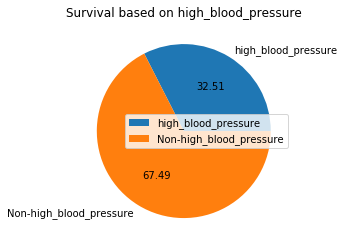

In [42]:
high_blood_pressure_records = clinical_records[clinical_records.high_blood_pressure==1]
high_blood_pressure_survival =high_blood_pressure_records[high_blood_pressure_records.DEATH_EVENT==0]


non_high_blood_pressure_records = clinical_records[clinical_records.high_blood_pressure==0]
non_high_blood_pressure_survival = non_high_blood_pressure_records[non_high_blood_pressure_records.DEATH_EVENT==0]

values = [high_blood_pressure_survival.shape[0],non_high_blood_pressure_survival.shape[0]]
df = pd.DataFrame(values)
labels= ['high_blood_pressure','Non-high_blood_pressure']
df.plot(kind='pie', subplots=True, autopct='%.2f',labels=labels)
plt.title('Survival based on high_blood_pressure')
plt.legend(labels, loc=5)
plt.ylabel('')
plt.show()

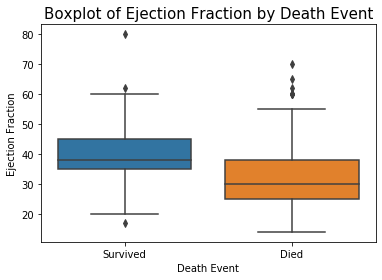

In [43]:
#Relationship between Ejection Fraction and Death Event
#Interestingly, patients with higher ejection fraction survived frequently than those with less ejection fraction 
sns.boxplot(clinical_records['DEATH_EVENT'], clinical_records['ejection_fraction'])
plt.xlabel("Death Event")
plt.ylabel("Ejection Fraction")
ticks = [0,1]
labels = ['Survived','Died']
plt.xticks(ticks,labels)
plt.title('Boxplot of Ejection Fraction by Death Event', fontsize = 15)
plt.show()

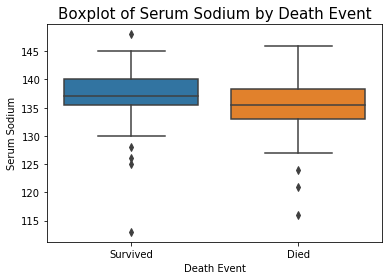

In [44]:
#Relationship between Serum Sodium and Death Event
#Patients generally with a higher serum sodium survived than those with less serum sodium
sns.boxplot(clinical_records['DEATH_EVENT'], clinical_records['serum_sodium'])
plt.xlabel("Death Event")
plt.ylabel("Serum Sodium")
ticks = [0,1]
labels = ['Survived','Died']
plt.xticks(ticks,labels)
plt.title('Boxplot of Serum Sodium by Death Event', fontsize = 15)
plt.show()

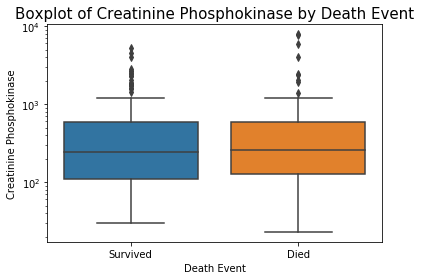

In [45]:
#Relationship between Creatinine Phosphokinase and Death Event
#Patients with higher Creatinine Phosphokinase died compared to those with lower Creatinine Phosphokinase.  
#This takes in consideration the outliers, which are valid as it could not be proved erroneous.
sns.boxplot(clinical_records['DEATH_EVENT'], clinical_records['creatinine_phosphokinase'])
plt.xlabel("Death Event")
plt.ylabel("Creatinine Phosphokinase")
plt.yscale('log')
ticks = [0,1]
labels = ['Survived','Died']
plt.xticks(ticks,labels)
plt.title('Boxplot of Creatinine Phosphokinase by Death Event', fontsize = 15)
plt.show()

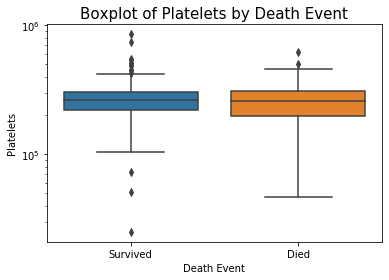

In [46]:
#Relationship between Platelets and Death event
sns.boxplot(clinical_records['DEATH_EVENT'], clinical_records['platelets'])
plt.xlabel("Death Event")
plt.ylabel("Platelets")
plt.yscale('log')
ticks = [0,1]
labels = ['Survived','Died']
plt.xticks(ticks,labels)
plt.title('Boxplot of Platelets by Death Event', fontsize = 15)
plt.show()

In [47]:
#DataModelling
#KNN
#It is known outliers are present within the data, therefore, it is important to standarize the data.

In [48]:
independent_features = clinical_records.drop('DEATH_EVENT',axis=1)
std_scale = preprocessing.StandardScaler().fit(independent_features)
data = std_scale.transform(independent_features)
columns = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']
df_std = pd.DataFrame(data,columns=columns)
df_std['DEATH_Event'] = clinical_records['DEATH_EVENT']
df_std.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_Event
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1
5,2.456114,1.147968,-0.552141,-0.847579,0.162199,1.359272,-6.079240e-01,0.683709,-1.050016,0.735688,1.454161,-1.577879,1
6,1.192945,1.147968,-0.346704,-0.847579,-1.953749,-0.735688,-1.396531e+00,-0.187726,0.085034,0.735688,-0.687682,-1.552067,1
7,-0.070223,1.147968,-0.275472,1.179830,1.854958,-0.735688,1.952488e+00,-0.284552,-1.277026,0.735688,1.454161,-1.552067,1
8,0.350833,-0.871105,-0.438583,-0.847579,2.278147,-0.735688,7.535660e-09,0.102752,0.312044,-1.359272,-0.687682,-1.552067,1
9,1.614001,1.147968,-0.473683,-0.847579,-0.260991,1.359272,1.276539e+00,7.752020,-0.823006,0.735688,1.454161,-1.552067,1


In [49]:
model_base = df_std.values
df_std_data = model_base[:,:-1]
df_std_target = model_base[:,-1]

In [50]:
df_std_data.shape

(299, 12)

In [51]:
df_std_target.shape

(299,)

In [52]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(df_std_data,df_std_target,test_size=0.4,random_state=0)
X_train_std

array([[ 1.78242381e+00, -8.71104775e-01, -5.28397342e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.34557396e+00],
       [-7.43912952e-01, -8.71104775e-01, -4.64391657e-01, ...,
         7.35688190e-01,  1.45416070e+00, -2.35671837e-01],
       [ 2.20347993e+00,  1.14796753e+00, -4.46841712e-01, ...,
         7.35688190e-01, -6.87681906e-01, -1.50044403e+00],
       ...,
       [ 2.03505748e+00,  1.14796753e+00, -4.95362150e-01, ...,
        -1.35927151e+00, -6.87681906e-01, -4.67976933e-01],
       [-7.02231493e-02, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01,  1.45416070e+00, -1.16489222e+00],
       [ 7.71889104e-01,  1.14796753e+00, -4.24130017e-01, ...,
         7.35688190e-01,  1.45416070e+00,  2.03126678e-01]])

In [53]:
#K-Fold cross validation
kf = model_selection.KFold(n_splits=5, random_state=None)

model = LogisticRegression(solver= 'liblinear')
 
result = cross_val_score(model , X_train_std, y_train_std, cv = kf)
 
print("Avg accuracy: {}".format(round(result.mean(),4)))
#Average accuracy is 82.17%, which means the model can make accurate predictions

Avg accuracy: 0.8217


In [54]:
#Leave-1 out cross validation
cv = LeaveOneOut()

model = LinearRegression()

scores = cross_val_score(model, X_train_std, y_train_std, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

mean(absolute(scores))
#This is an excellent score as it means the model is close to predicting the actual observations

0.3040526845608758

In [55]:
#Now, we need to paramter optimisation

In [56]:
neighbors = list(range(1,20))

cv_scores = [ ]

for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train_std,y_train_std,cv = 10,scoring =
    "accuracy")
    cv_scores.append(scores.mean())

In [57]:
mse = [1-x for x in cv_scores]
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))
#We know the best value for neighbors, so we can now manually tune the other parameters, such as weights and p

The optimal no. of neighbors is 5


In [79]:
clf = KNeighborsClassifier(n_neighbors=5,weights="uniform",p=2)
fit = clf.fit(X_train_std,y_train_std)
y_pre = fit.predict(X_test_std)
#After manually tuning the other parameters, it is found out that these are the best parameters

In [80]:
cm = confusion_matrix(y_test_std,y_pre)
print(cm)

[[78  4]
 [25 13]]


In [81]:
print(classification_report(y_test_std,y_pre))

              precision    recall  f1-score   support

         0.0       0.76      0.95      0.84        82
         1.0       0.76      0.34      0.47        38

    accuracy                           0.76       120
   macro avg       0.76      0.65      0.66       120
weighted avg       0.76      0.76      0.73       120



In [82]:
print(round(clf.score(X_test_std,y_test_std),4))

0.7583


In [62]:
#Let's compare the score without standarization

In [83]:
data = clinical_records.drop('DEATH_EVENT',axis=1)
target = clinical_records['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.4,random_state=0)

In [84]:
neighbors = list(range(1,20))

cv_scores = [ ]

for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring =
    "accuracy")
    cv_scores.append(scores.mean())

In [85]:
mse = [1-x for x in cv_scores]
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))

The optimal no. of neighbors is 14


In [86]:
kf = model_selection.KFold(n_splits=5, random_state=None)

model = LogisticRegression(solver= 'liblinear')
 
result = cross_val_score(model , X_train, y_train, cv = kf)
 
print("Avg accuracy: {}".format(round(result.mean(),4)))
#The average accuracy is 83.29%, which is a good score and it means our model is efficient in making predicitions.

Avg accuracy: 0.8329


In [87]:
cv = LeaveOneOut()

model = LinearRegression()

scores = cross_val_score(model, X_train, y_train,scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

mean(absolute(scores))

0.30405268456086454

In [104]:
clf = KNeighborsClassifier(n_neighbors=14,weights="uniform",p=1)
fit = clf.fit(X_train,y_train)
y_pre = fit.predict(X_test)

In [105]:
cm = confusion_matrix(y_test,y_pre)
print(cm)

[[76  6]
 [37  1]]


In [106]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78        82
           1       0.14      0.03      0.04        38

    accuracy                           0.64       120
   macro avg       0.41      0.48      0.41       120
weighted avg       0.50      0.64      0.55       120



In [107]:
print(round(clf.score(X_test,y_test),4))

0.6417


In [70]:
#As it can be seen, standarizing did help improve mean accuracy. However, the accuracy for prediciting deaths did not increase
#as expected. Surprising fact is the K-folds score is higher without standarization than the model with standarization.
#The absolute mean error remained almost same for both models. 
#The dataset which is not standardised does a poor job in prediciting the deaths, though it accurately predicts survival.
#Therefore, the dataset which has independent features standardised is the best for making predicitions. 

In [ ]:
#DecisionTree